# Seaborn

- built on top of matplotlib
- makes common complicated mpl use cases easy
- focus on dataframes and aggregating
- figures vs axes -- `plt.subplots`

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data acquisition

In [2]:
df = pd.read_csv('kickstarter.csv')

df = df[['category', 'location', 'status', 'goal', 'pledged', 'backers', 'duration']]

df.category = df.category.str.replace('&amp;', '&')
top_4_categories = df.category.value_counts().head(4).index
df = df[df.category.isin(top_4_categories)]
df['state'] = df.location.str[-2:]
df = df.drop(columns='location')
top_4_states = df.state.value_counts().head(4).index
df = df[df.state.isin(top_4_states)]
df = df[df.status.isin(['successful', 'failed'])]

df = df[df.goal < 5_000]
df = df[df.pledged < 15_000]
df = df[df.backers > 10]

In [3]:
df.head()

,category,status,goal,pledged,backers,duration,state
8,Music,successful,1000.0,1125.0,30,67.53,IL
15,Film & Video,successful,250.0,310.0,16,30.00,IL
40,Music,successful,500.0,955.0,29,22.13,TX
51,Film & Video,successful,1000.0,1017.0,26,60.04,NY
67,Film & Video,successful,1500.0,1660.0,22,30.00,NY


Text(0.5, 0.98, 'Pledged vs Goal Amount by State')

<Figure size 1152x648 with 0 Axes>

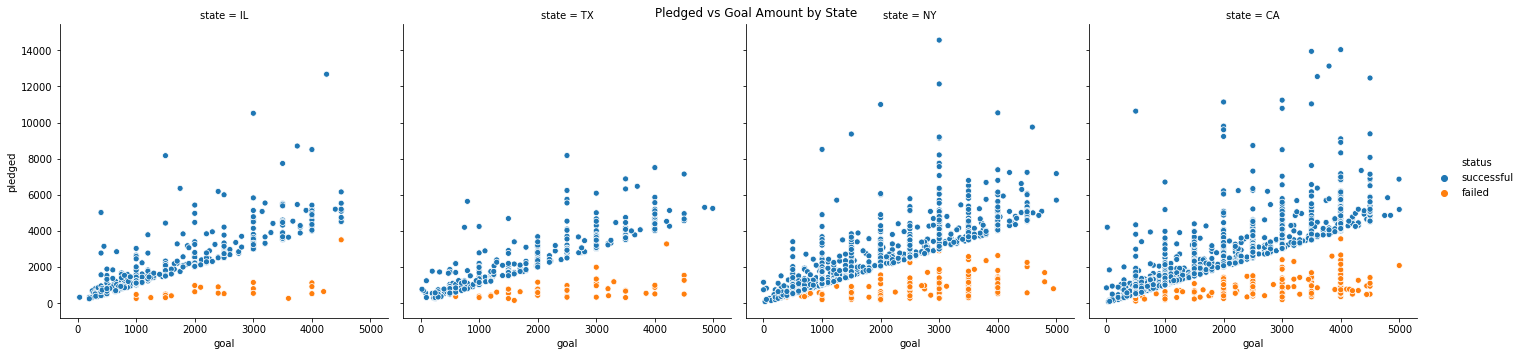

In [4]:
plt.figure(figsize=(16, 9))
sns.relplot(data=df, y='pledged', x='goal', hue='status', col='state')
plt.suptitle('Pledged vs Goal Amount by State')

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text yticklabel objects>)

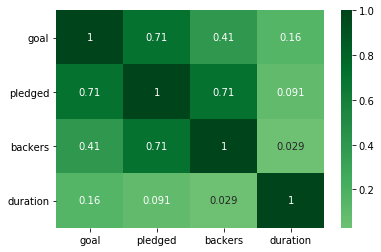

In [5]:
sns.heatmap(df.corr(), annot=True, center=0, cmap='Greens')
plt.yticks(rotation=0)

In [6]:
(df.pledged / df.goal).mean()

1.962456877941062

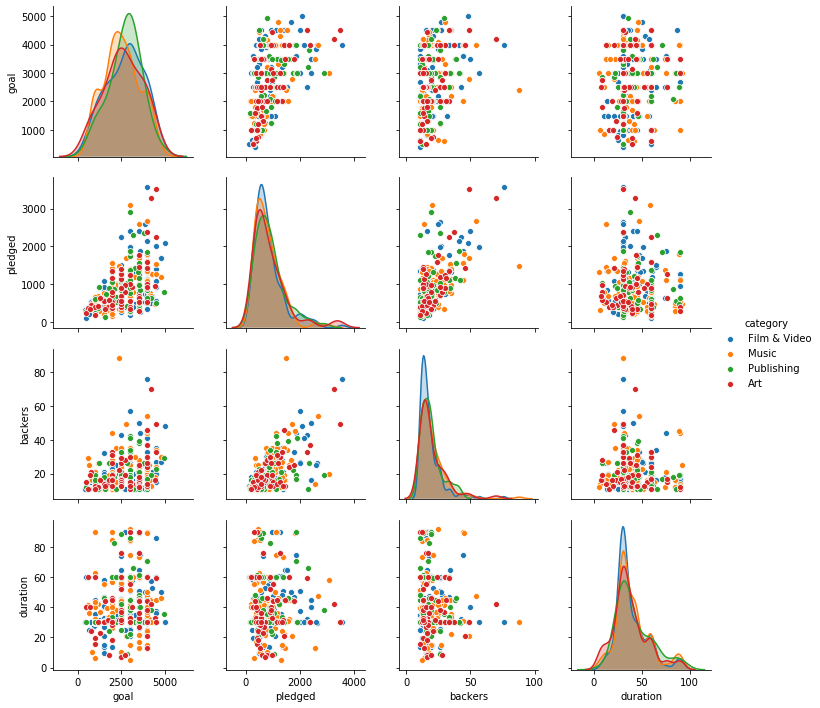

In [7]:
sns.pairplot(df[df.status == 'failed'], hue='category')

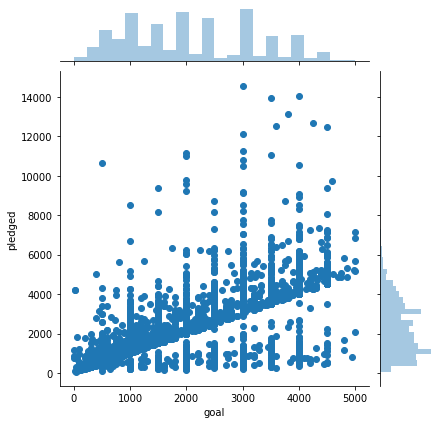

In [8]:
sns.jointplot(data=df, y='pledged', x='goal')

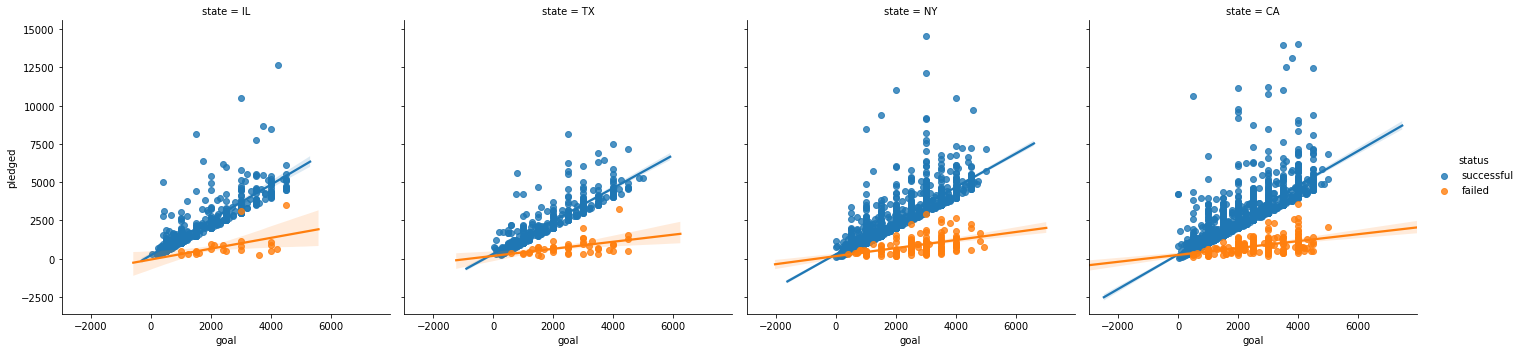

In [9]:
sns.lmplot(data=df, y='pledged', x='goal', hue='status', col='state')

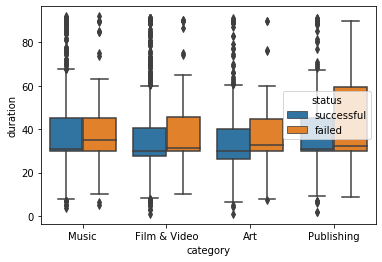

In [10]:
# boxplots
sns.boxplot(data=df, y='duration', x='category', hue='status')

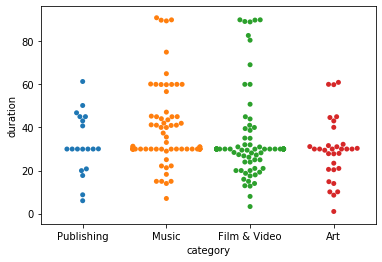

In [11]:
sample = df.sample(200)
sns.swarmplot(data=sample, y='duration', x='category')

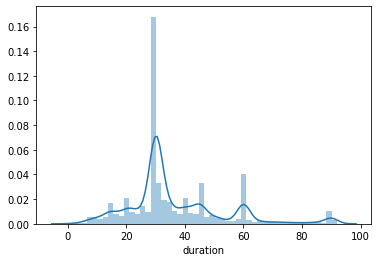

In [12]:
sns.distplot(df.duration)

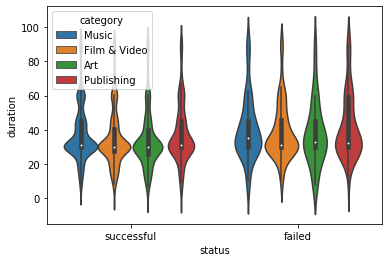

In [13]:
sns.violinplot(data=df, y='duration', x='status', hue='category')

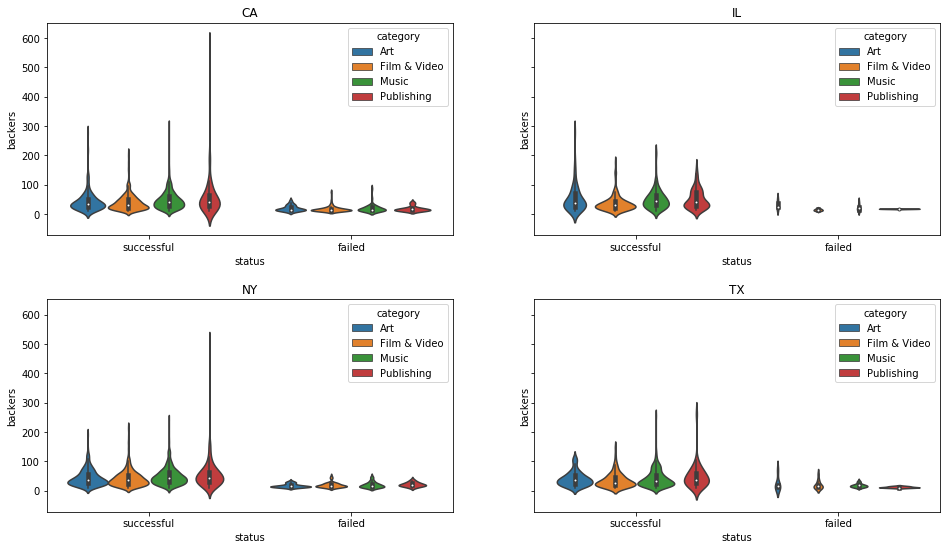

In [14]:
y = 'backers'
x = 'status'
hue = 'category'
layout = 'state'

fig, axs = plt.subplots(2, 2, sharey=True, figsize=(16, 9))

for ax, (state, subset) in zip(axs.ravel(), df.groupby(layout)):
    sns.violinplot(data=subset.sort_values(by='category'), y=y, x=x, hue=hue, ax=ax)
    ax.set(title=state)

fig.subplots_adjust(hspace=.3)

In [15]:
plt.rc('figure', figsize=(16, 9))
plt.rc('font', size=16)
plt.rc('axes.spines', top=False, right=False)

Text(1, 14, '19.4 Backers')

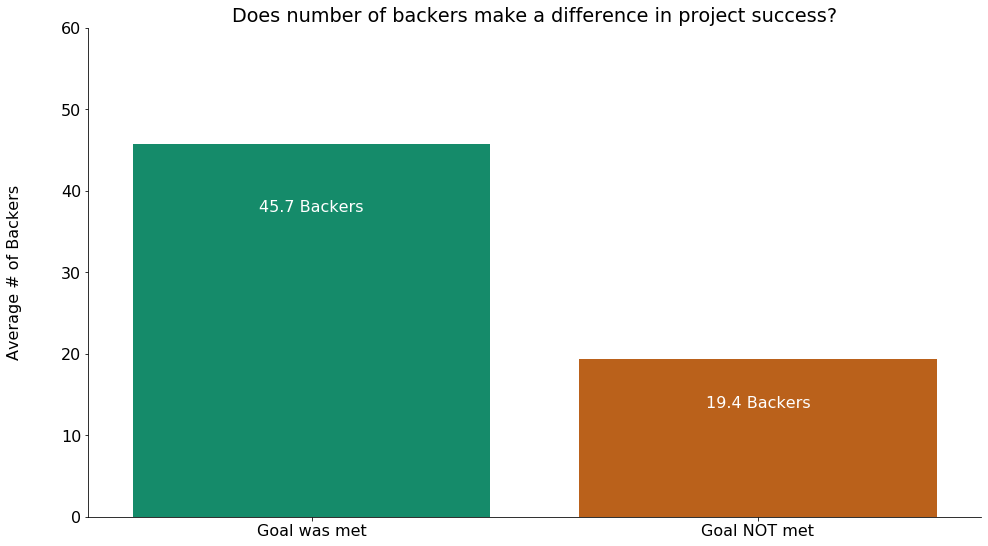

In [47]:
# palette = ['papayawhip', 'pink']
# palette = 'Blues'
palette = sns.color_palette('colorblind')[2:4]
sns.barplot(data=df, y='backers', x='status', estimator=np.mean, ci=None, palette=palette)
plt.ylim(0, 60)
plt.xlabel('')
plt.ylabel('Average # of Backers\n\n')
plt.title('Does number of backers make a difference in project success?')
xticks, labels = plt.xticks()
labels = ['Goal was met', 'Goal NOT met']
plt.xticks(xticks, labels)
plt.text(
    0,
    38,
    f'{df[df.status == "successful"].backers.mean():.1f} Backers',
    ha='center',
    va='center',
    color='white'
)
plt.text(
    1,
    14,
    f'{df[df.status == "failed"].backers.mean():.1f} Backers',
    ha='center',
    va='center',
    color='white'
)

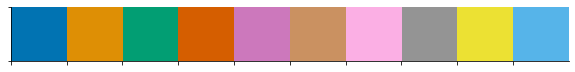

In [36]:
sns.palplot(sns.color_palette('colorblind'))